### First and foremost, I need to grab all of the necessary libraries that will be needed to make the predictions of who survive the titatnic tragedy. I needed to get the path to the data set first, and then pull that into the notebook with Pandas, and the OS library.

In [251]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# datapathing
import os

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

In [252]:
datapath = os.path.join('data','')

In [253]:
test_df = pd.read_csv(datapath + "test.csv")
train_df = pd.read_csv(datapath + "train.csv")

### First I wanted to get an idea of what kind of data I was working with. This would sort of drive the decision process for modifying the data. It needs to be modified because the decision tree wouldn't be able to understand how to handle objects, they needed to be numeric types. 

In [254]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### I then did a simple describe to get an idea of the completeness of the dataset. This would be helpful in dealing with missing values, and errors in the data.

In [255]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### I then wanted to look at the head of the dataframe, mainly just to get an idea of what a typical record looked like and to also determine what needed to be changed to a numeric value or possibly dropped from the dataframe.

In [256]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


### Seeing that both Age and Cabin had NaN values in them, I wanted to get a better idea of how much the missing values in the dataframe were affecting these two columns. So I calculated the percent of null values in those columns. This would tell me if it would be worth keeping these columns in the dataframe, or simply getting rid of them.

In [257]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [258]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Now I needed to decide which features I believed would contribute to a high chance of survival. The features above (survived excluded) that I believe would truly contribute are Pclass, Sex, Age, and possibly cabin. I think that these features might be correlated because of priorities given to different class levels or females versus males when boarding life boats. Age might also have an affect due to priorities placed on children for a lifeboat spot. And lastly, a cabin location or deck might place you closer to a lifeboat or the top of the boat, possibly increasing your survival chances(though the cabin column is very empty). 

Text(0.5, 1.0, 'Male')

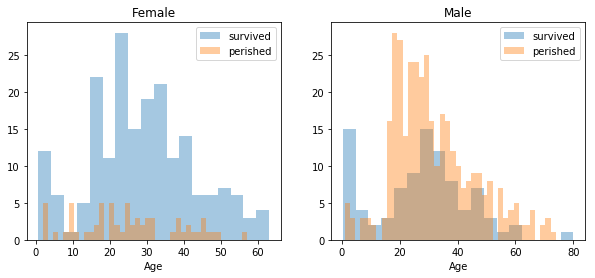

In [259]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
axis = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False)
axis = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'perished', ax = axes[0], kde =False)
axis.legend()
axis.set_title('Female')
axis = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde = False)
axis = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'perished', ax = axes[1], kde = False)
axis.legend()
axis.set_title('Male')

### The plots above clearly depict that there is a strong probability of women surviving the disaster versus men. This aligns with what I thought earlier about women being given higher priority.

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


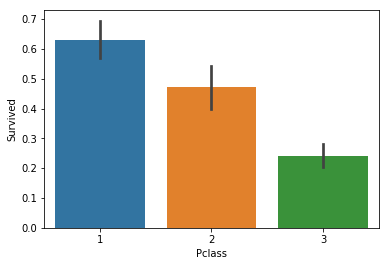

In [260]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

### The bar graph above clearly shows that the class of a particular person is a good indicator of survival, with first class being the highest probability and third class being the lowest probability.

### Before I could use age as an indicator, I need to make sure it is complete. To do this I decided to just go with using a random number from the range where most ages fell in the distribution.

In [261]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill empty values in Age column with these random values
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [262]:
# Just making sure there aren't any empty fields left for age
train_df["Age"].isnull().sum()

0

### To make age more usefull and consistent as an indicator, I divided it's values into groups rather than having values ranging from 0 to 80

In [263]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

### I also needed to make the gender a numeric value. This was done by creating a new key and mapping it to the original set.

In [264]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

### Once all of my features were cleaned and made into numeric values, I just needed to drop all of the features that I felt were irrelevant to survival.

In [265]:
train_df = train_df.drop(['Embarked'], axis=1)
test_df = test_df.drop(['Embarked'], axis=1)

### I did end up dropping the cabin field, as I felt it was not useful enough.

In [266]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [267]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [268]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [269]:
train_df = train_df.drop(['SibSp'], axis=1)
test_df = test_df.drop(['SibSp'], axis=1)

In [270]:
train_df = train_df.drop(['Parch'], axis=1)
test_df = test_df.drop(['Parch'], axis=1)

In [271]:
train_df = train_df.drop(['Fare'], axis=1)
test_df = test_df.drop(['Fare'], axis=1)

In [272]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [273]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
dtypes: int32(1), int64(3)
memory usage: 24.4 KB


### This is final product of the dataframe that will be passed to the decision tree classifier.

In [274]:
train_df.head(10)

,Survived,Pclass,Sex,Age
0,0,3,0,2
1,1,1,1,5
2,1,3,1,3
3,1,1,1,5
4,0,3,0,5
5,0,3,0,1
6,0,1,0,6
7,0,3,0,0
8,1,3,1,3
9,1,2,1,1


### The next few cells are setting up training and test dataframes, training the decision tree, and then building the answer dataframe to send to a csv file.

In [275]:
# Obviously need to drop the survived column since it is the target value.
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [276]:
# Make survival predictions with a decision tree classifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test)  

In [278]:
# Build answer df
answer_df = pd.read_csv(datapath + "test.csv",usecols=["PassengerId"])
answer_df['Survived'] = Y_pred

answer_df.head(100)
# Send to CSV file
# answer_df.to_csv('answers/Age_Gender_Pclass.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,1
9,901,0
